## __Predictions Using Validation Dataset__

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import dump, load

In [2]:
#load previously trained, persistent models
svmclf = load('bn_svm.sav')
nbcclf = load('bn_nbc.sav')
logregclf = load('bn_logreg.sav')

In [3]:
#read in validation patient dataset
valptdf = pd.read_csv('/Users/nicksbox/Documents/Data/BN/validationpts.csv')

In [4]:
valptdf = valptdf.drop(['Unnamed: 0'], axis=1)

In [5]:
valptdf.shape

(11183, 8)

In [6]:
data = valptdf

### __Make Predictions on Validation Dataset with Models__

In [7]:
#test models
#label target
cols =[col for col in data.columns if col not in ['Label']]
X = data[cols]
y = data['Label']

#### __Logistic Regression Classifier Predictions__

In [8]:
#test LogReg Classifier
yhat = logregclf.predict(X)

In [9]:
#confusion matrix for Logreg
confusion_matrix(y, yhat)

array([[  71, 2122],
       [   0, 8990]])

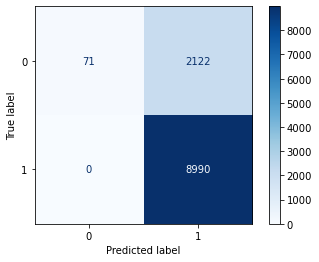

In [10]:
plot_confusion_matrix(logregclf, X,y, cmap=plt.cm.Blues)
plt.show()

#### __SVM Classifier Predictions__

In [72]:
#test SVM Classifier
yhat = svmclf.predict(X)

In [73]:
#confusion matrix for SVM
confusion_matrix(y, yhat)

array([[  71, 2122],
       [   0, 8990]])

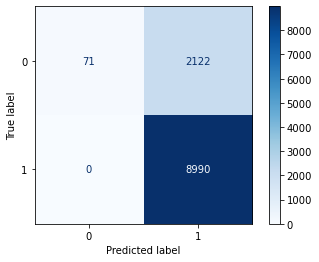

In [83]:
plot_confusion_matrix(svmclf, X,y, cmap=plt.cm.Blues)
plt.show()

In [74]:
#model performance
average_precision = average_precision_score(yhat, y)
print("Precision:", average_precision)
recall = recall_score(yhat, y)
print("Recall:", recall)
f1 = f1_score(yhat, y)
print("F1 Score:", f1)
AUROC = roc_auc_score(yhat, y)
print("AUROC:", AUROC)

Precision: 0.9987875797799898
Recall: 0.8090352771778258
F1 Score: 0.8944383643418565
AUROC: 0.9045176385889129


#### __Naive Bayes Classifier Predictions__

In [75]:
#BNC
yhat = nbcclf.predict(X)

In [76]:
#confusion matrix for NBC
confusion_matrix(y, yhat)

array([[   0, 2193],
       [   0, 8990]])

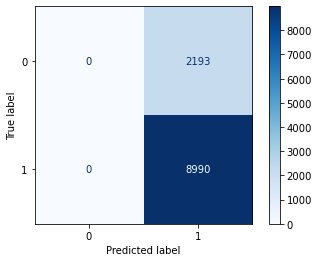

In [84]:
plot_confusion_matrix(nbcclf, X,y, cmap=plt.cm.Blues)
plt.show()

In [88]:
#model performance
average_precision = average_precision_score(yhat, y)
print("Precision:", average_precision)
recall = recall_score(yhat, y)
print("Recall:", recall)
f1 = f1_score(yhat, y)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.8038987749262273
F1 Score: 0.8912903385713576
